Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


inertia value for k-means= 1 is 10000.00000000001
inertia value for k-means= 2 is 6504.839875872424
inertia value for k-means= 3 is 4426.496680812782
inertia value for k-means= 4 is 1780.4172638655577
inertia value for k-means= 5 is 924.3159961688092
inertia value for k-means= 6 is 894.2329139898177
inertia value for k-means= 7 is 854.8374276907741
inertia value for k-means= 8 is 829.7289176236724
inertia value for k-means= 9 is 793.1318468902041
inertia value for k-means= 10 is 785.3194353120092


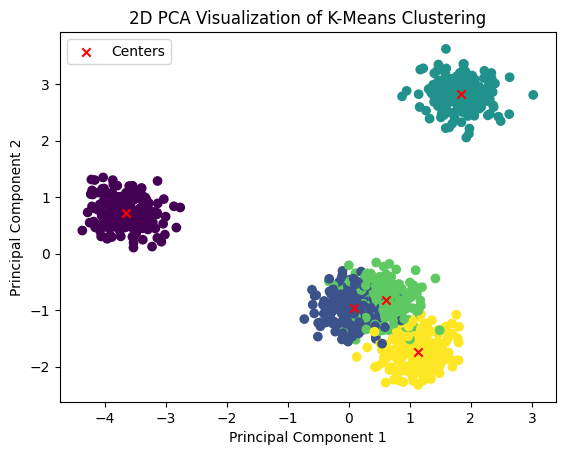

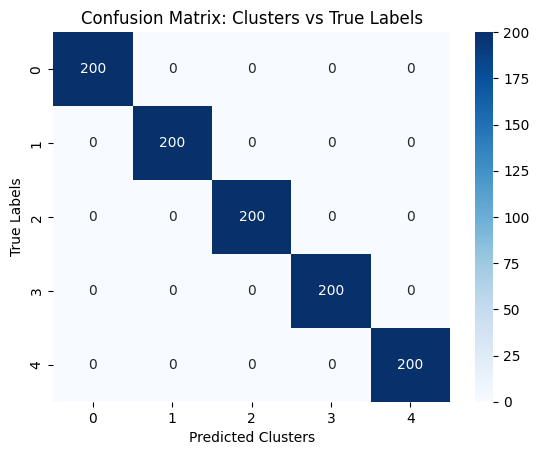

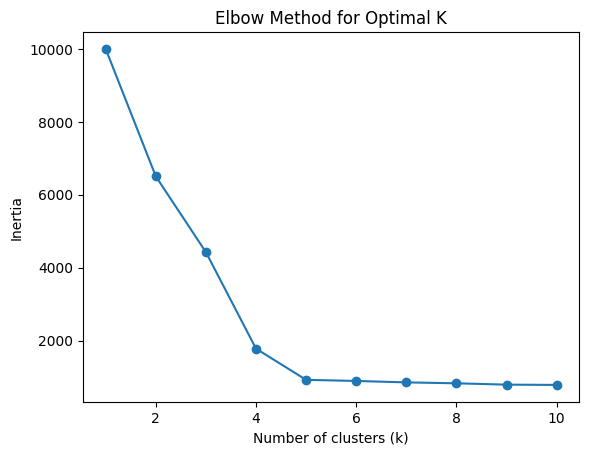

In [ ]:
# your code here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns

#Computing inertia values
inertia_values = []
k_range = range(1,11)

for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(X)
  inertia_values.append(kmeans.inertia_)
  print("inertia value for k-means=", k, "is", inertia_values[k-1])

#initialize PCA to 2 components
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)

#initialize KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

#cluster labels
labels = kmeans.labels_

centers = pca.transform(kmeans.cluster_centers_)

#plot results with PCA scaling
plt.scatter(principal_components[:,0], principal_components[:,1], c = labels, cmap='viridis', marker='o')
plt.scatter(centers[:,0], centers[:,1], c='red', marker = 'x', label = 'Centers')
plt.title("2D PCA Visualization of K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("PCA_vis_kcluster.png")
plt.show()

#confusion matrix
cm = confusion_matrix(y_true, labels)

#match clusters to actual using hungarian matching algorithm
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))

#remap labels to labels of original dataset
y_pred_mapped = np.array([mapping[label] for label in labels])

cm_mapped = confusion_matrix(y_true, y_pred_mapped)

sns.heatmap(cm_mapped, annot = True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.savefig("confusion_matrix.png")
plt.show()

#elbow analysis (just use the inertia values found before and plot))
plt.plot(k_range, inertia_values, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_analysis.png")
plt.show()


# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


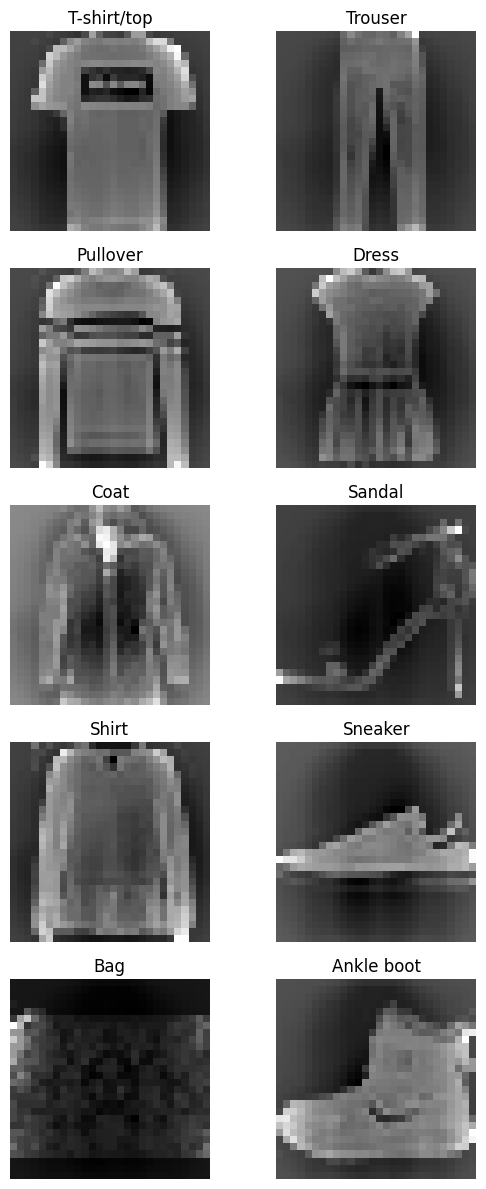

inertia value for k-means= 1 is 54880000.000000276
inertia value for k-means= 2 is 46121784.2885168
inertia value for k-means= 3 is 41897117.44367166
inertia value for k-means= 4 is 38026763.40931672
inertia value for k-means= 5 is 36400980.623526745
inertia value for k-means= 6 is 34717104.76753205
inertia value for k-means= 7 is 33822869.631598294
inertia value for k-means= 8 is 32187041.898120582
inertia value for k-means= 9 is 31456121.437036134
inertia value for k-means= 10 is 30556099.637276225
inertia value for k-means= 11 is 30068671.1030957
inertia value for k-means= 12 is 29423047.137429073
inertia value for k-means= 13 is 28686777.768502455
inertia value for k-means= 14 is 28458812.367713377
inertia value for k-means= 15 is 28057979.798079386
inertia value for k-means= 16 is 27670634.13091673
inertia value for k-means= 17 is 27268625.394356977
inertia value for k-means= 18 is 27057005.70439056
inertia value for k-means= 19 is 26713882.473189704
inertia value for k-means= 20 

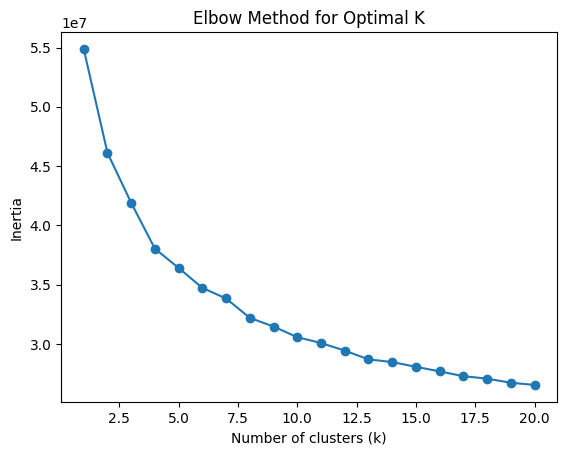

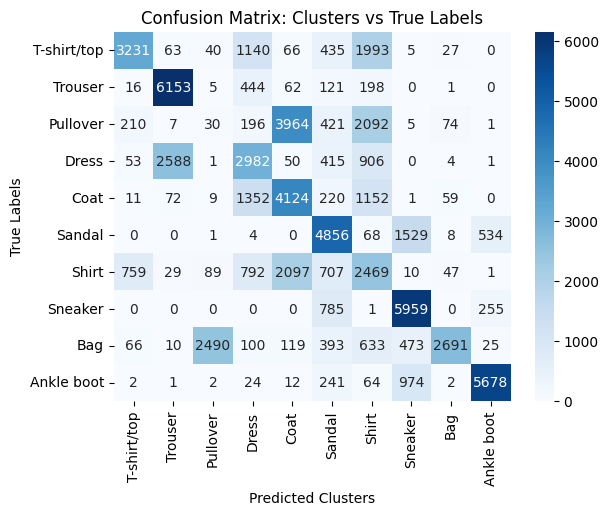

In [ ]:
# your code here
#plotting articles of clothing
clothing_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#take first example in each class
unique_clothing = []
for label in np.unique(y):
  idx = np.where(y == label)[0][0]
  unique_clothing.append((X[idx], label))

#plot 5x2
fig,axes = plt.subplots(5,2,figsize = (6,12))

for ax, (img_flattened, label) in zip(axes.flat, unique_clothing):
  ax.imshow(img_flattened.reshape(28,28), cmap="gray")
  ax.set_title(clothing_names[label])
  ax.axis("off")
plt.tight_layout()
plt.savefig("clothings.png")
plt.show()

#k-means clusters analysis
#standardize the dataset
X = StandardScaler().fit_transform(X)

#Computing inertia values
inertia_values = []
k_range = range(1,21)

for k in k_range:
  kmeans = KMeans(n_clusters = k).fit(X)
  inertia_values.append(kmeans.inertia_)
  print("inertia value for k-means=", k, "is", inertia_values[k-1])

#elbow analysis (just use the inertia values found before and plot))
plt.plot(k_range, inertia_values, marker = "o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_analysis_fashion.png")
plt.show()

#initialize KMeans
kmeans = KMeans(n_clusters = 10)
y_pred = kmeans.fit_predict(X)

#confusion matrix
cm = confusion_matrix(y, y_pred)

#match clusters to actual using hungarian matching algorithm
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))

#remap labels to labels of original dataset
y_pred_mapped = np.array([mapping[label] for label in y_pred])

cm_mapped = confusion_matrix(y, y_pred_mapped)

sns.heatmap(cm_mapped, annot = True, fmt="d", cmap="Blues", xticklabels=clothing_names, yticklabels=clothing_names)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.savefig("confusion_matrix_fashion.png")
plt.show()



# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr, spearmanr

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

#plotting articles of clothing
clothing_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X = StandardScaler().fit_transform(X)

#target dimensions to explore with PCA and random projection
dimensions = [10, 20, 50, 100, 200]

#storage setup
pca_pearson, pca_spearman = [],[]
rp_pearson, rp_spearman = [],[]

#original pairwise distances
original_D = pairwise_distances(X, metric="euclidean")

#perform pca and random projection for each target dimension
for k in dimensions:
  #pca
  pca_X = PCA(n_components = k).fit_transform(X)
  pca_D = pairwise_distances(X_pca, metric="euclidean")
  r_p, _ = pearsonr(original_D.ravel(), pca_D.ravel())
  r_s, _ = spearmanr(original_D.ravel(), pca_D.ravel())
  pca_pearson.append(r_p)
  pca_spearman.append(r_s)

  #random projection
  rp_X = GaussianRandomProjection(n_components=k).fit_transform(X_std)
  rp_D = pairwise_distances(rp_X, metric="euclidean")
  r_p, _ = pearsonr(original_D.ravel(), rp_D.ravel())
  r_s, _ = spearmanr(original_D.ravel(), rp_D.ravel())
  rp_pearson.append(r_p)
  rp_spearman.append(r_s)

#plot results



# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here